In [207]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [208]:
path = "raw.csv"
df_raw = pd.read_csv(path)
df = df_raw.copy()

In [209]:
df.head(4)

id  age  education sex is_smoking  cigsperday  bpmeds  prevalentstroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   

   prevalenthyp  diabetes  totchol  sysbp  diabp    bmi  heartrate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   

   tenyearchd  
0           1  
1           0  
2           0  
3           1

In [210]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsperday', 'bpmeds',
       'prevalentstroke', 'prevalenthyp', 'diabetes', 'totchol', 'sysbp',
       'diabp', 'bmi', 'heartrate', 'glucose', 'tenyearchd'],
      dtype='object')

In [211]:
rows,columns= df.shape
# Print the number of rows and columns
print("Number of Rows:", rows)
print("Number of Columns:", columns)

Number of Rows: 3391
Number of Columns: 17


In [212]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3391 entries, 0 to 3390
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3391 non-null   int64  
 1   age              3391 non-null   int64  
 2   education        3304 non-null   float64
 3   sex              3391 non-null   object 
 4   is_smoking       3391 non-null   object 
 5   cigsperday       3369 non-null   float64
 6   bpmeds           3347 non-null   float64
 7   prevalentstroke  3391 non-null   int64  
 8   prevalenthyp     3391 non-null   int64  
 9   diabetes         3391 non-null   int64  
 10  totchol          3353 non-null   float64
 11  sysbp            3391 non-null   float64
 12  diabp            3391 non-null   float64
 13  bmi              3377 non-null   float64
 14  heartrate        3390 non-null   float64
 15  glucose          3087 non-null   float64
 16  tenyearchd       3391 non-null   int64  
dtypes: float64(9),

In [213]:
numerical_columns = ['age','cigsperday','totchol', 'sysbp','diabp', 'bmi', 'heartrate', 'glucose']
categorical_columns = ['education','sex','is_smoking','bpmeds', 'prevalentstroke', 'prevalenthyp','diabetes']

In [214]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

# Print the count of duplicate values
print("Duplicate Value Count:", duplicate_count)

Duplicate Value Count: 1


In [215]:
# Missing Values/Null Values Count
missing_values_count = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values Count:")
print(missing_values_count)

Missing Values Count:
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsperday          22
bpmeds              44
prevalentstroke      0
prevalenthyp         0
diabetes             0
totchol             38
sysbp                0
diabp                0
bmi                 14
heartrate            1
glucose            304
tenyearchd           0
dtype: int64


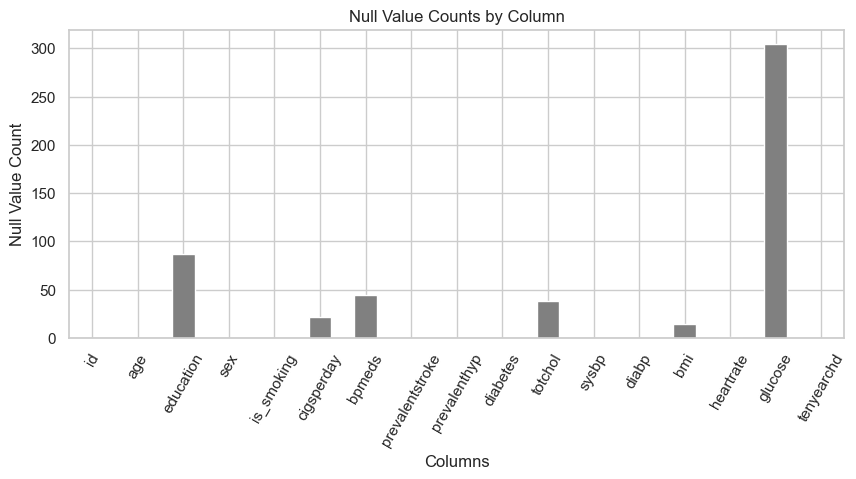

In [216]:
# Visualizing the missing values
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
missing_values_count.plot(kind='bar', color='grey')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts by Column')
plt.xticks(rotation=60)  # Rotate the x-axis labels for better visibility
plt.show()

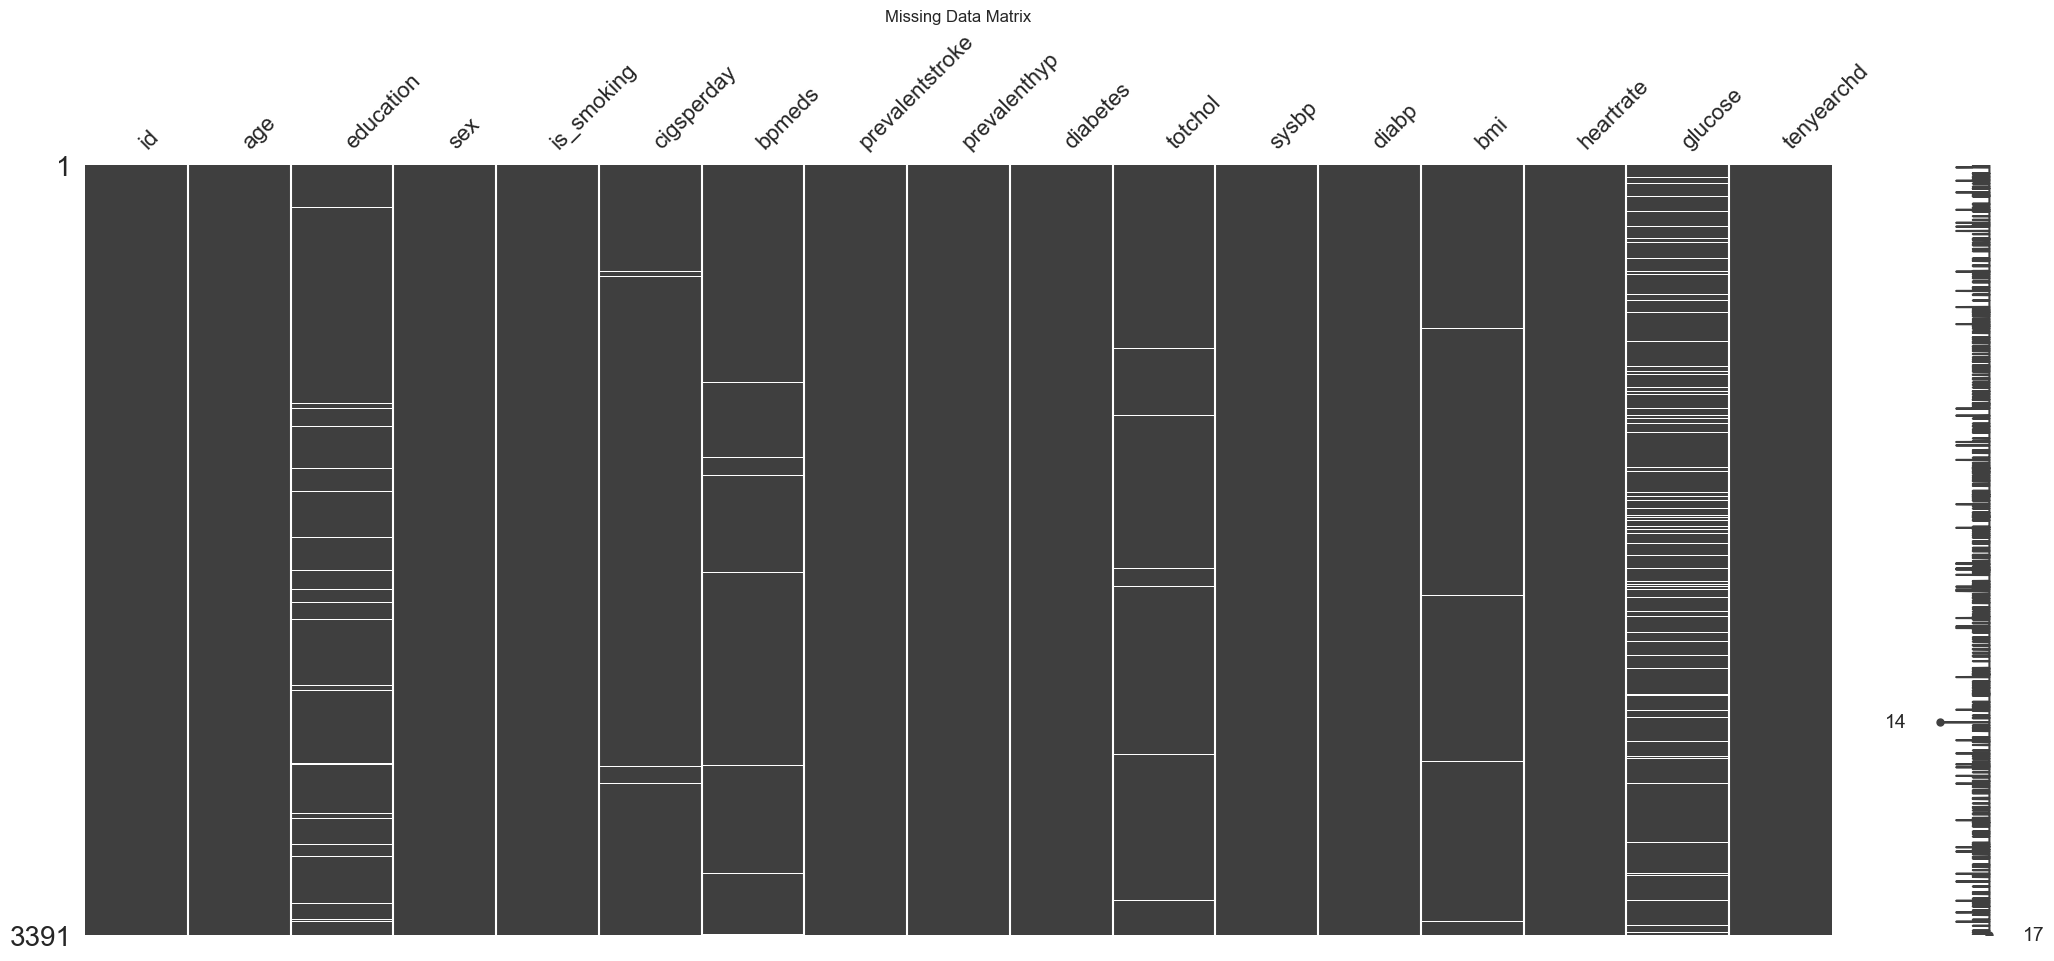

In [217]:
# Visualizing the missing values
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

In [218]:
df.isnull().mean()

id                 0.000000
age                0.000000
education          0.025656
sex                0.000000
is_smoking         0.000000
cigsperday         0.006488
bpmeds             0.012976
prevalentstroke    0.000000
prevalenthyp       0.000000
diabetes           0.000000
totchol            0.011206
sysbp              0.000000
diabp              0.000000
bmi                0.004129
heartrate          0.000295
glucose            0.089649
tenyearchd         0.000000
dtype: float64

# EDA - univariate analysis

In [219]:
df[numerical_columns].describe()

age   cigsperday      totchol        sysbp        diabp  \
count  3391.000000  3369.000000  3353.000000  3391.000000  3391.000000   
mean     49.543497     9.066785   237.089472   132.598643    82.881303   
std       8.591952    11.878342    45.249227    22.289231    12.022232   
min      32.000000     0.000000   107.000000    83.500000    48.000000   
25%      42.000000     0.000000   206.000000   117.000000    74.500000   
50%      49.000000     0.000000   234.000000   128.500000    82.000000   
75%      56.000000    20.000000   264.000000   144.000000    90.000000   
max      70.000000    70.000000   696.000000   295.000000   142.500000   

               bmi    heartrate      glucose  
count  3377.000000  3390.000000  3087.000000  
mean     25.796174    75.978171    82.089731  
std       4.115440    11.970215    24.241482  
min      15.960000    45.000000    40.000000  
25%      23.020000    68.000000    71.000000  
50%      25.380000    75.000000    78.000000  
75%      28.040000    83.000000    87.000000  
max      56.800000   143.000000   394.000000

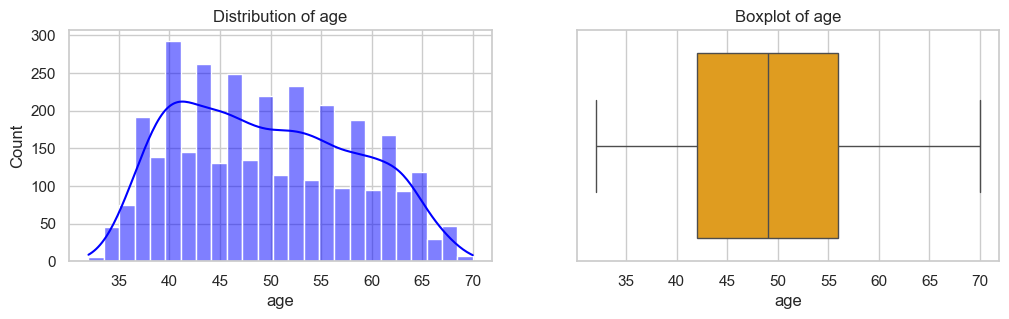

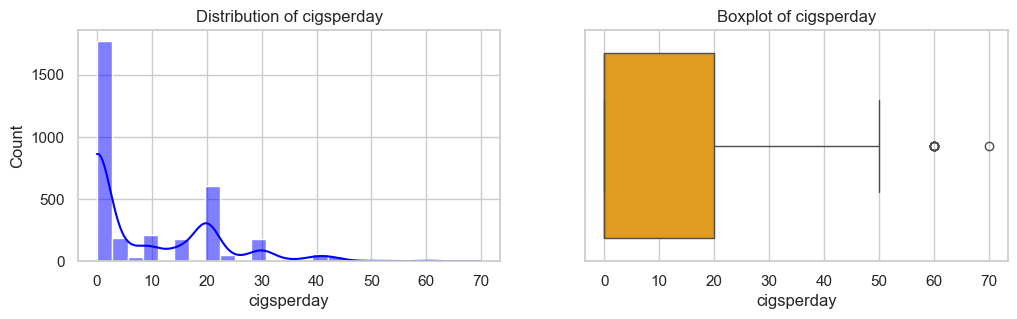

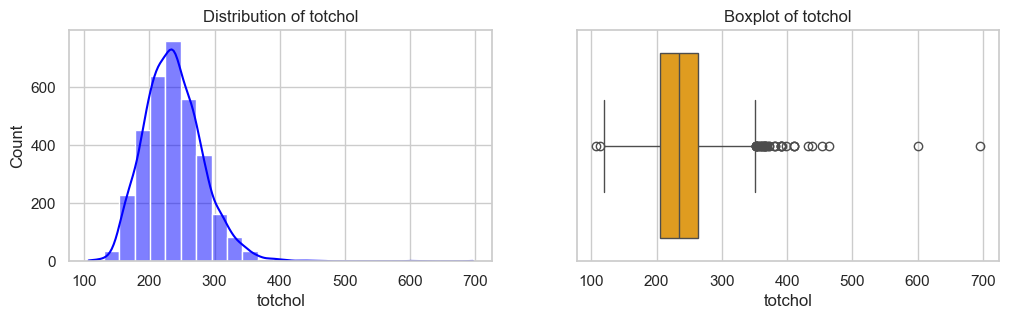

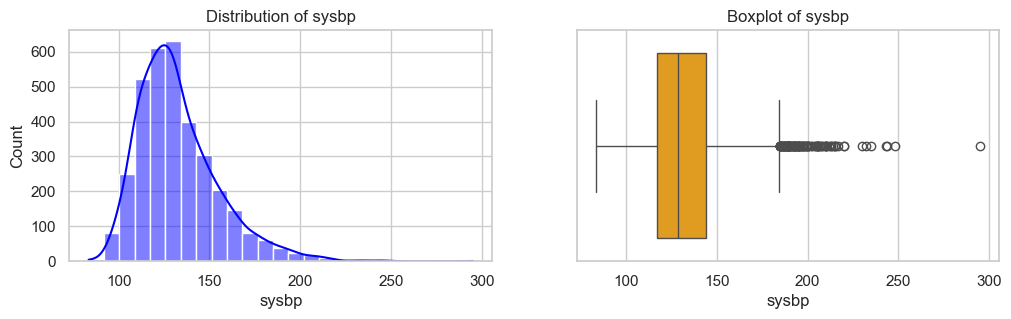

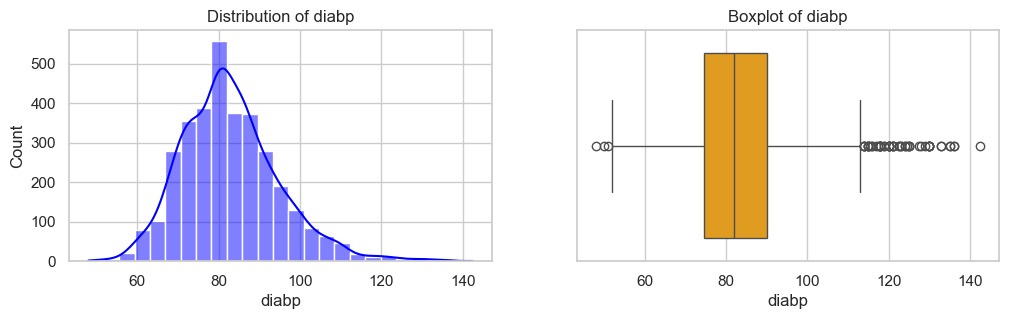

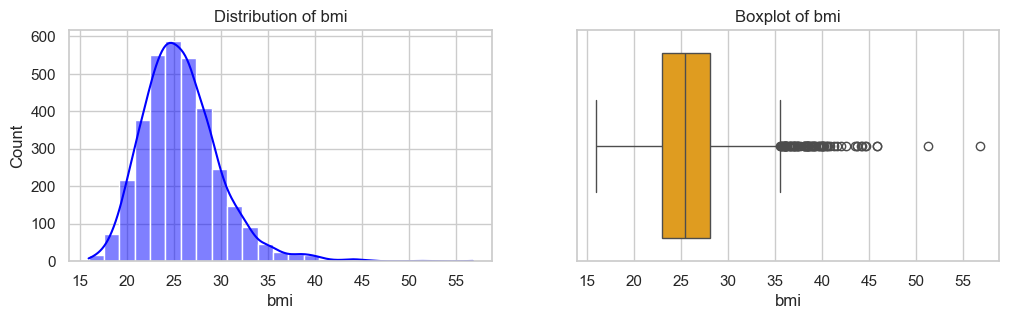

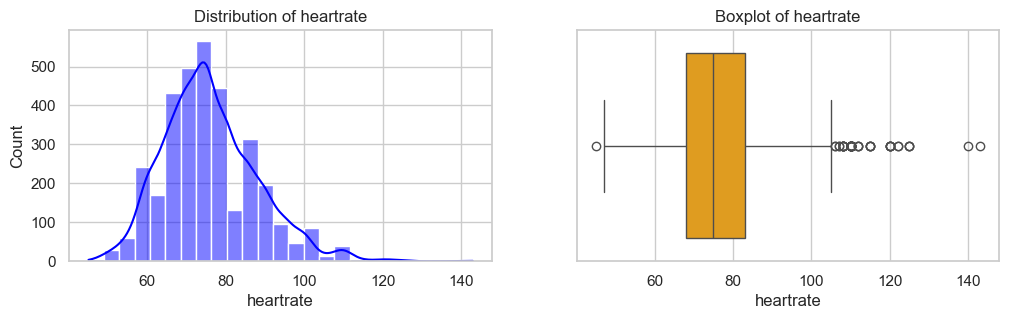

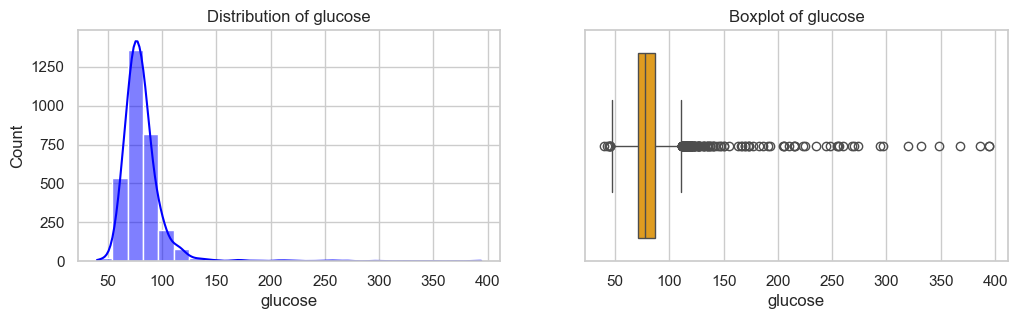

In [220]:
for col in numerical_columns:
    plt.figure(figsize=(12,3))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=25, color='blue')
    plt.title(f"Distribution of {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot of {col}")

    plt.show()

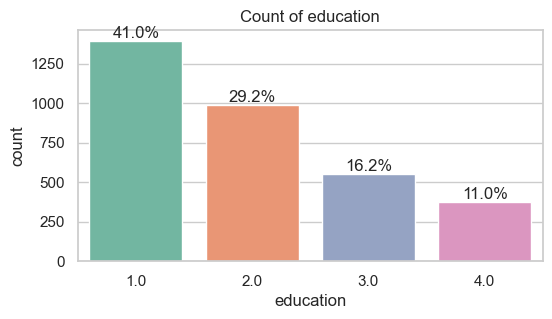

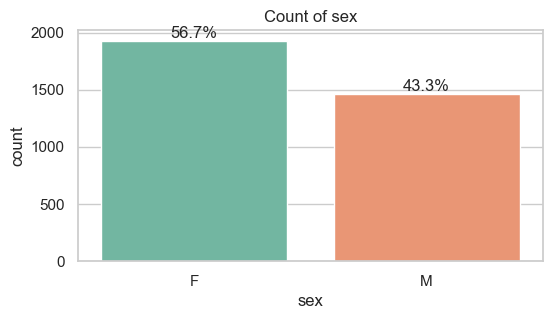

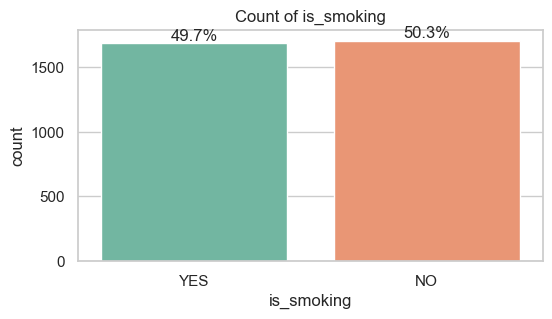

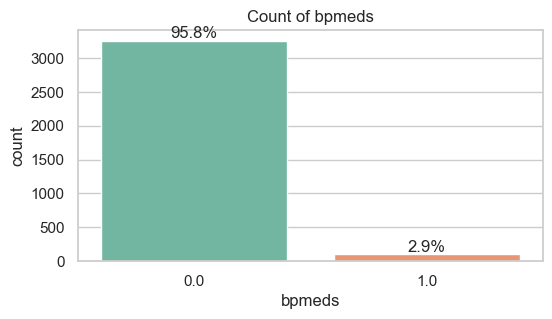

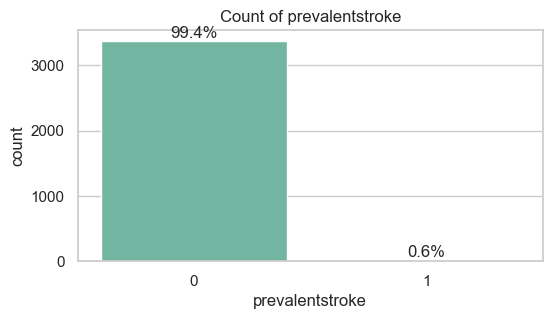

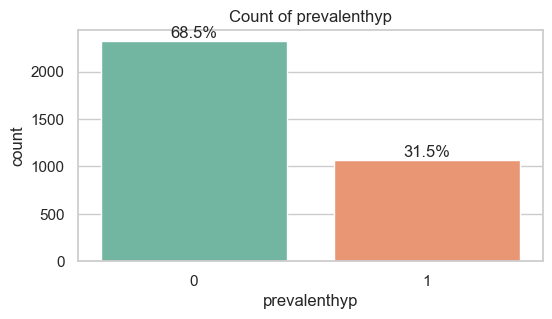

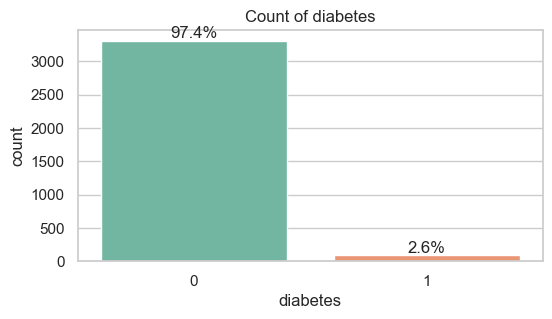

In [221]:
for col in categorical_columns:
    plt.figure(figsize=(6,3))
    ax = sns.countplot(x=df[col], palette="Set2")
    plt.title(f"Count of {col}")
    
    # Show percentages on bars
    total = len(df[col])
    for p in ax.patches:
        percentage = f'{100 * p.get_height()/total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show()


##### ⚠️ Note: Before dropping imbalanced features (bpmeds, diabetes), you can:Use statistical tests (Chi-square test with target) → see if significantly associated with CHD.Train with and without them → compare model performance.

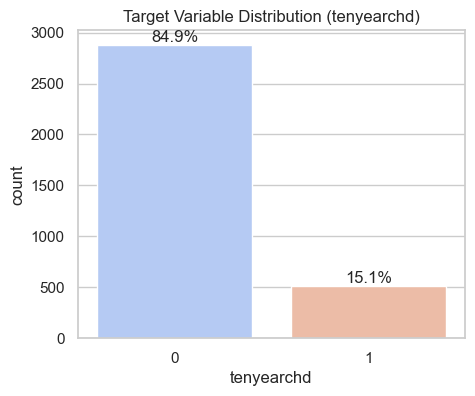

In [222]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df['tenyearchd'], palette="coolwarm")
plt.title("Target Variable Distribution (tenyearchd)")

# Show percentages on bars
total = len(df['tenyearchd'])
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


##### My target column is imbalanced

## BI - VARIATE ANALYSIS

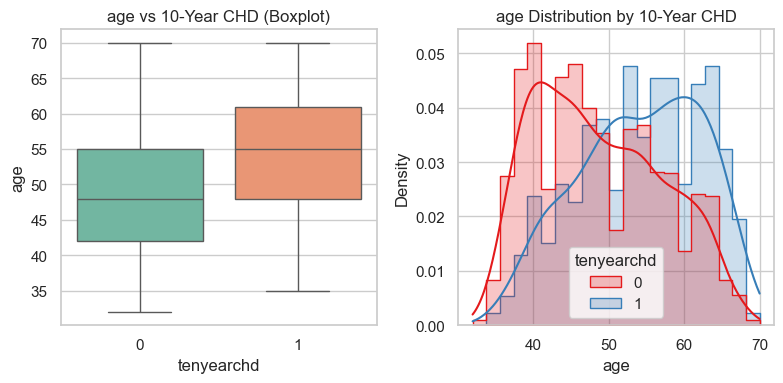

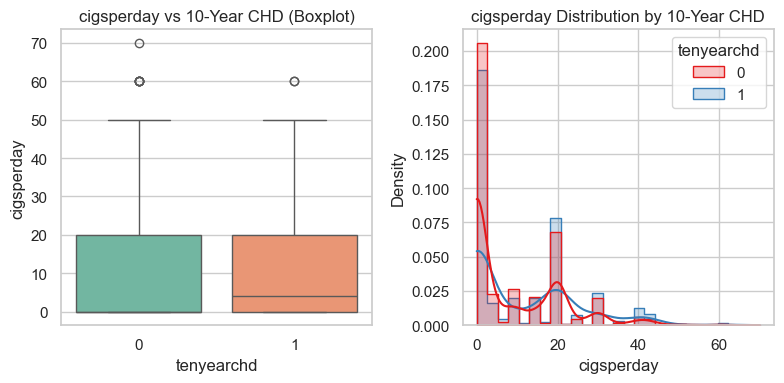

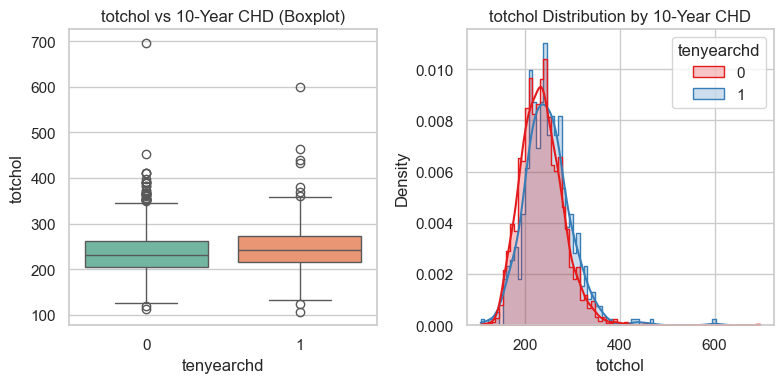

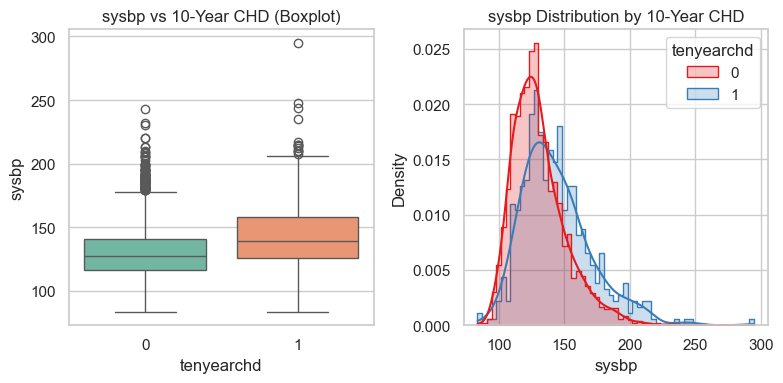

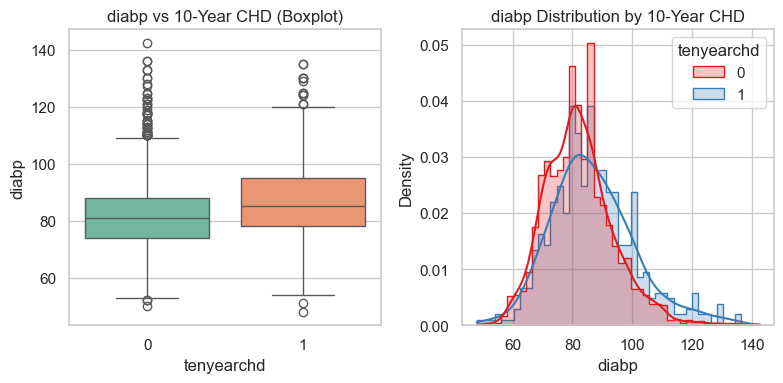

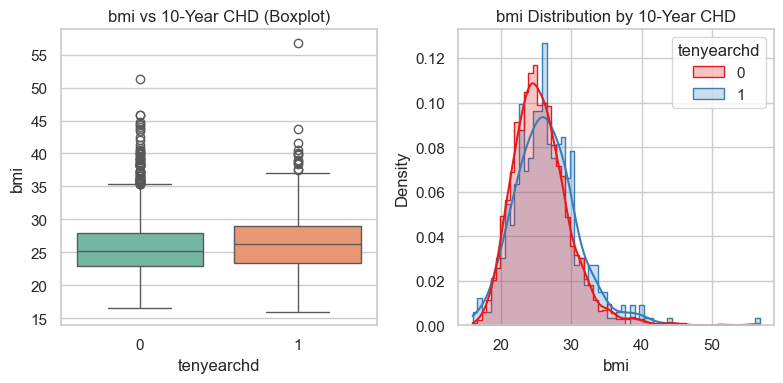

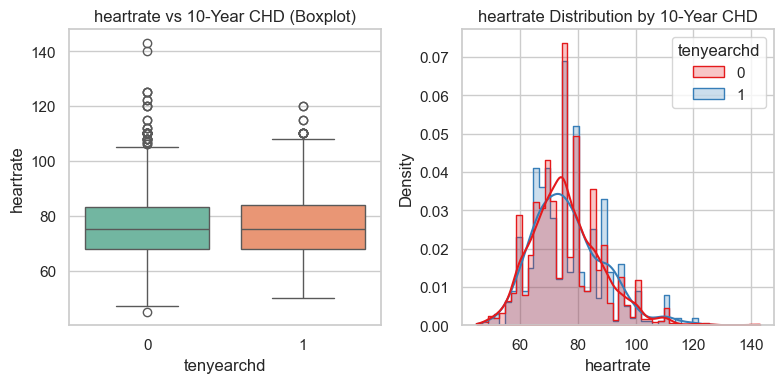

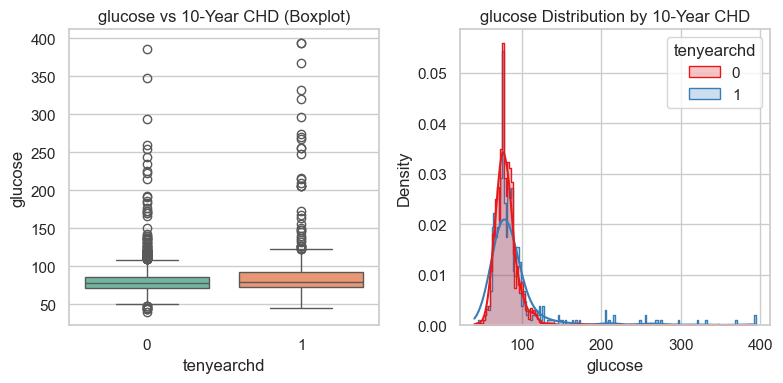

In [223]:
# Loop through numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8,4))

    # Boxplot
    plt.subplot(1,2,1)
    sns.boxplot(x="tenyearchd", y=col, data=df, palette="Set2")
    plt.title(f"{col} vs 10-Year CHD (Boxplot)")

    # Histogram / KDE
    plt.subplot(1,2,2)
    sns.histplot(data=df, x=col, hue="tenyearchd", kde=True, element="step", stat="density", common_norm=False, palette="Set1")
    plt.title(f"{col} Distribution by 10-Year CHD")

    plt.tight_layout()
    plt.show()


## Bi variate analysis for categorical columns

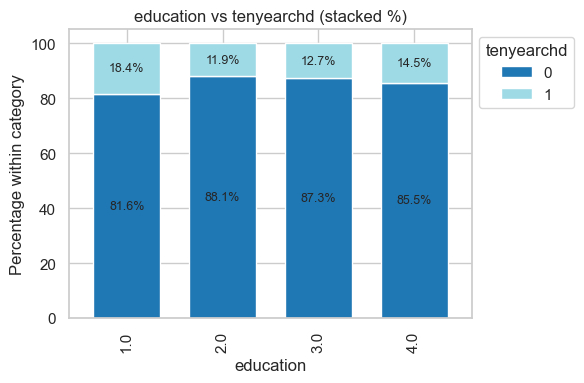

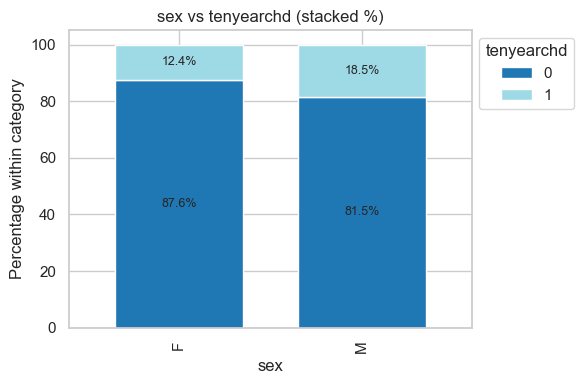

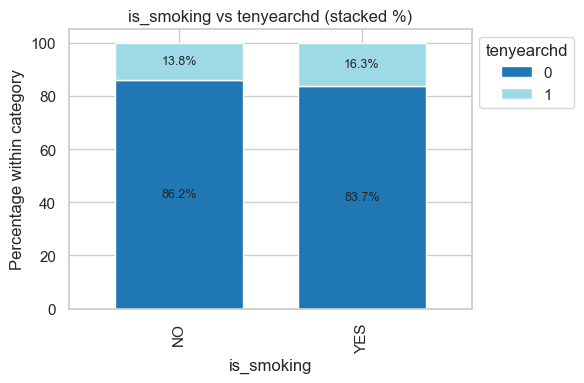

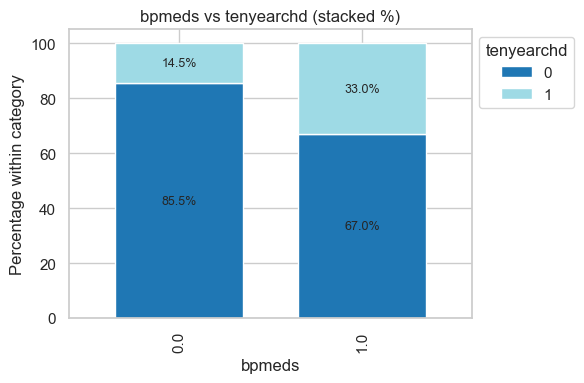

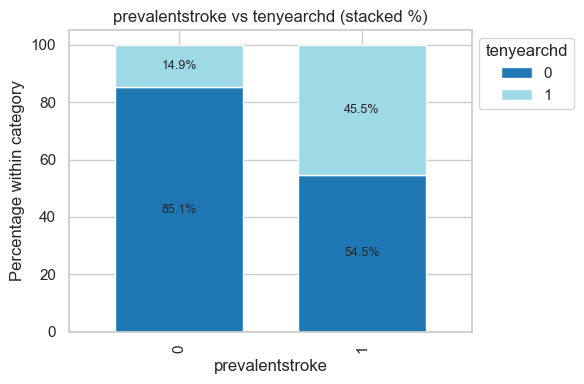

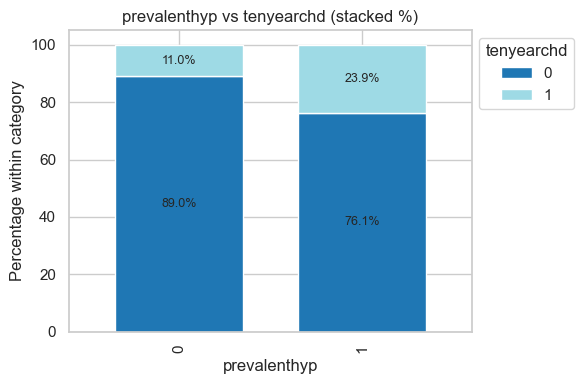

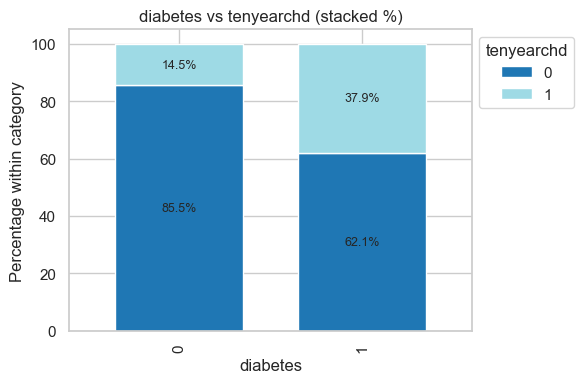

In [224]:
def plot_stacked_percentage(df, col, target='tenyearchd', figsize=(6,4), cmap='tab20'):
    ct = pd.crosstab(df[col], df[target]).astype(int)
    ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100  # percent within each row/category

    ax = ct_pct.plot(kind='bar', stacked=True, figsize=figsize, colormap=cmap, width=0.7)
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage within category')
    ax.set_title(f'{col} vs {target} (stacked %)')
    ax.legend(title=target, bbox_to_anchor=(1.0, 1.0))
    
    # Annotate interior of stacked bars with percent labels
    for container in ax.containers:
        # container corresponds to one stacked layer (one target value)
        ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# Example usage:
for col in categorical_columns:
    plot_stacked_percentage(df, col, target='tenyearchd')


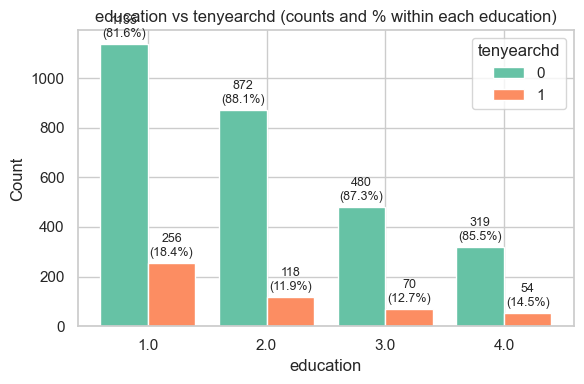

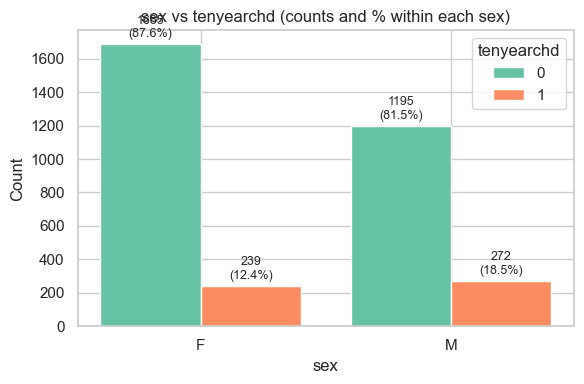

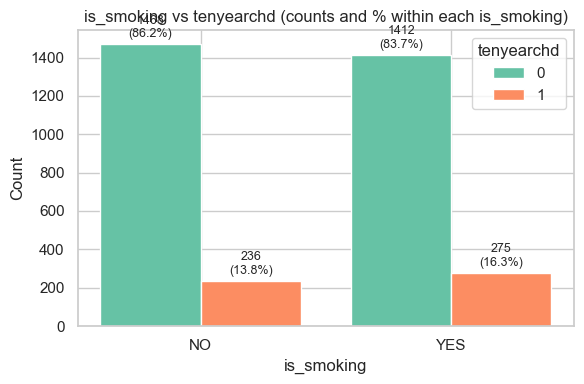

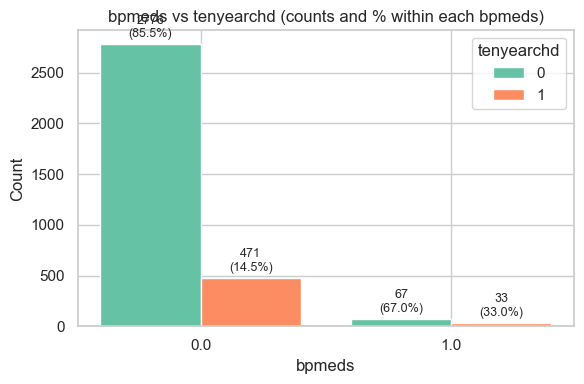

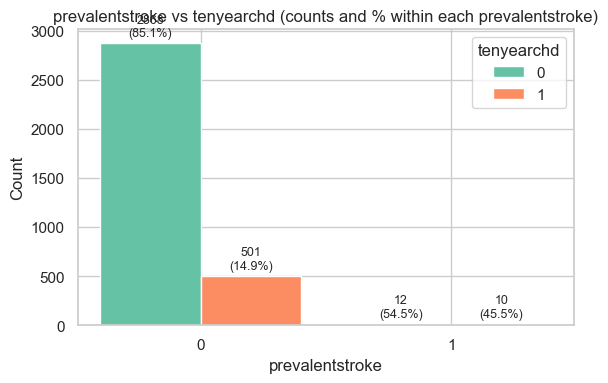

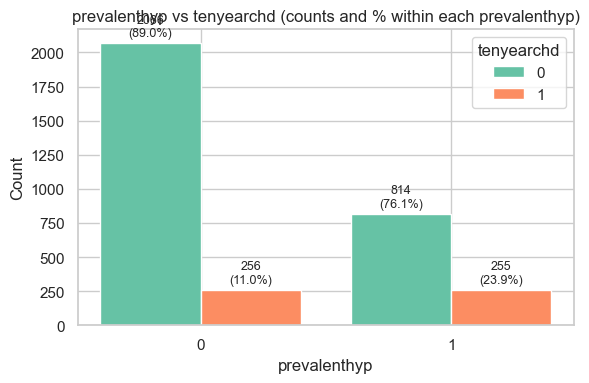

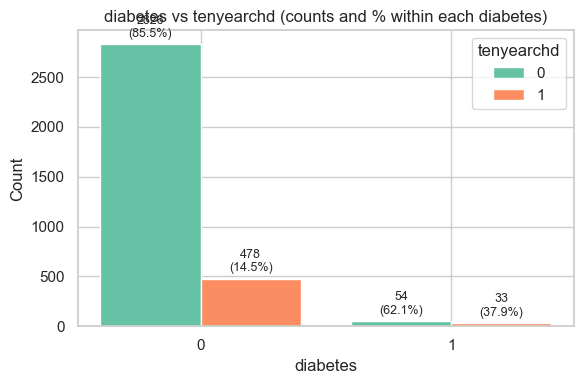

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

def plot_grouped_counts_with_pct(df, col, target='tenyearchd', figsize=(6,4), palette=None):
    ct = pd.crosstab(df[col], df[target]).astype(int)      # counts per category x target
    ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100          # percent within each category (rows)
    
    labels = ct.columns.tolist()       # e.g. [0, 1]
    categories = ct.index.tolist()
    x = np.arange(len(categories))
    n = len(labels)
    width = 0.8 / n

    if palette is None:
        palette = sns.color_palette("Set2", n_colors=n)

    fig, ax = plt.subplots(figsize=figsize)
    for i, lab in enumerate(labels):
        counts = ct[lab].values
        # position bars so groups are centered on integer ticks
        bars = ax.bar(x + i*width - (n-1)/2*width, counts, width, label=str(lab), color=palette[i])

        # annotate each bar: count on first line, percent on second line
        for j, bar in enumerate(bars):
            h = bar.get_height()
            pct = ct_pct.iloc[j, i]
            ax.annotate(f'{h}\n({pct:.1f}%)',
                        xy=(bar.get_x() + bar.get_width() / 2, h),
                        xytext=(0, 3), textcoords='offset points',
                        ha='center', va='bottom', fontsize=9)

    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(f'{col} vs {target} (counts and % within each {col})')
    ax.legend(title=target)
    plt.tight_layout()
    plt.show()

# Example usage for all categorical columns:
for col in categorical_columns:
    plot_grouped_counts_with_pct(df, col, target='tenyearchd')


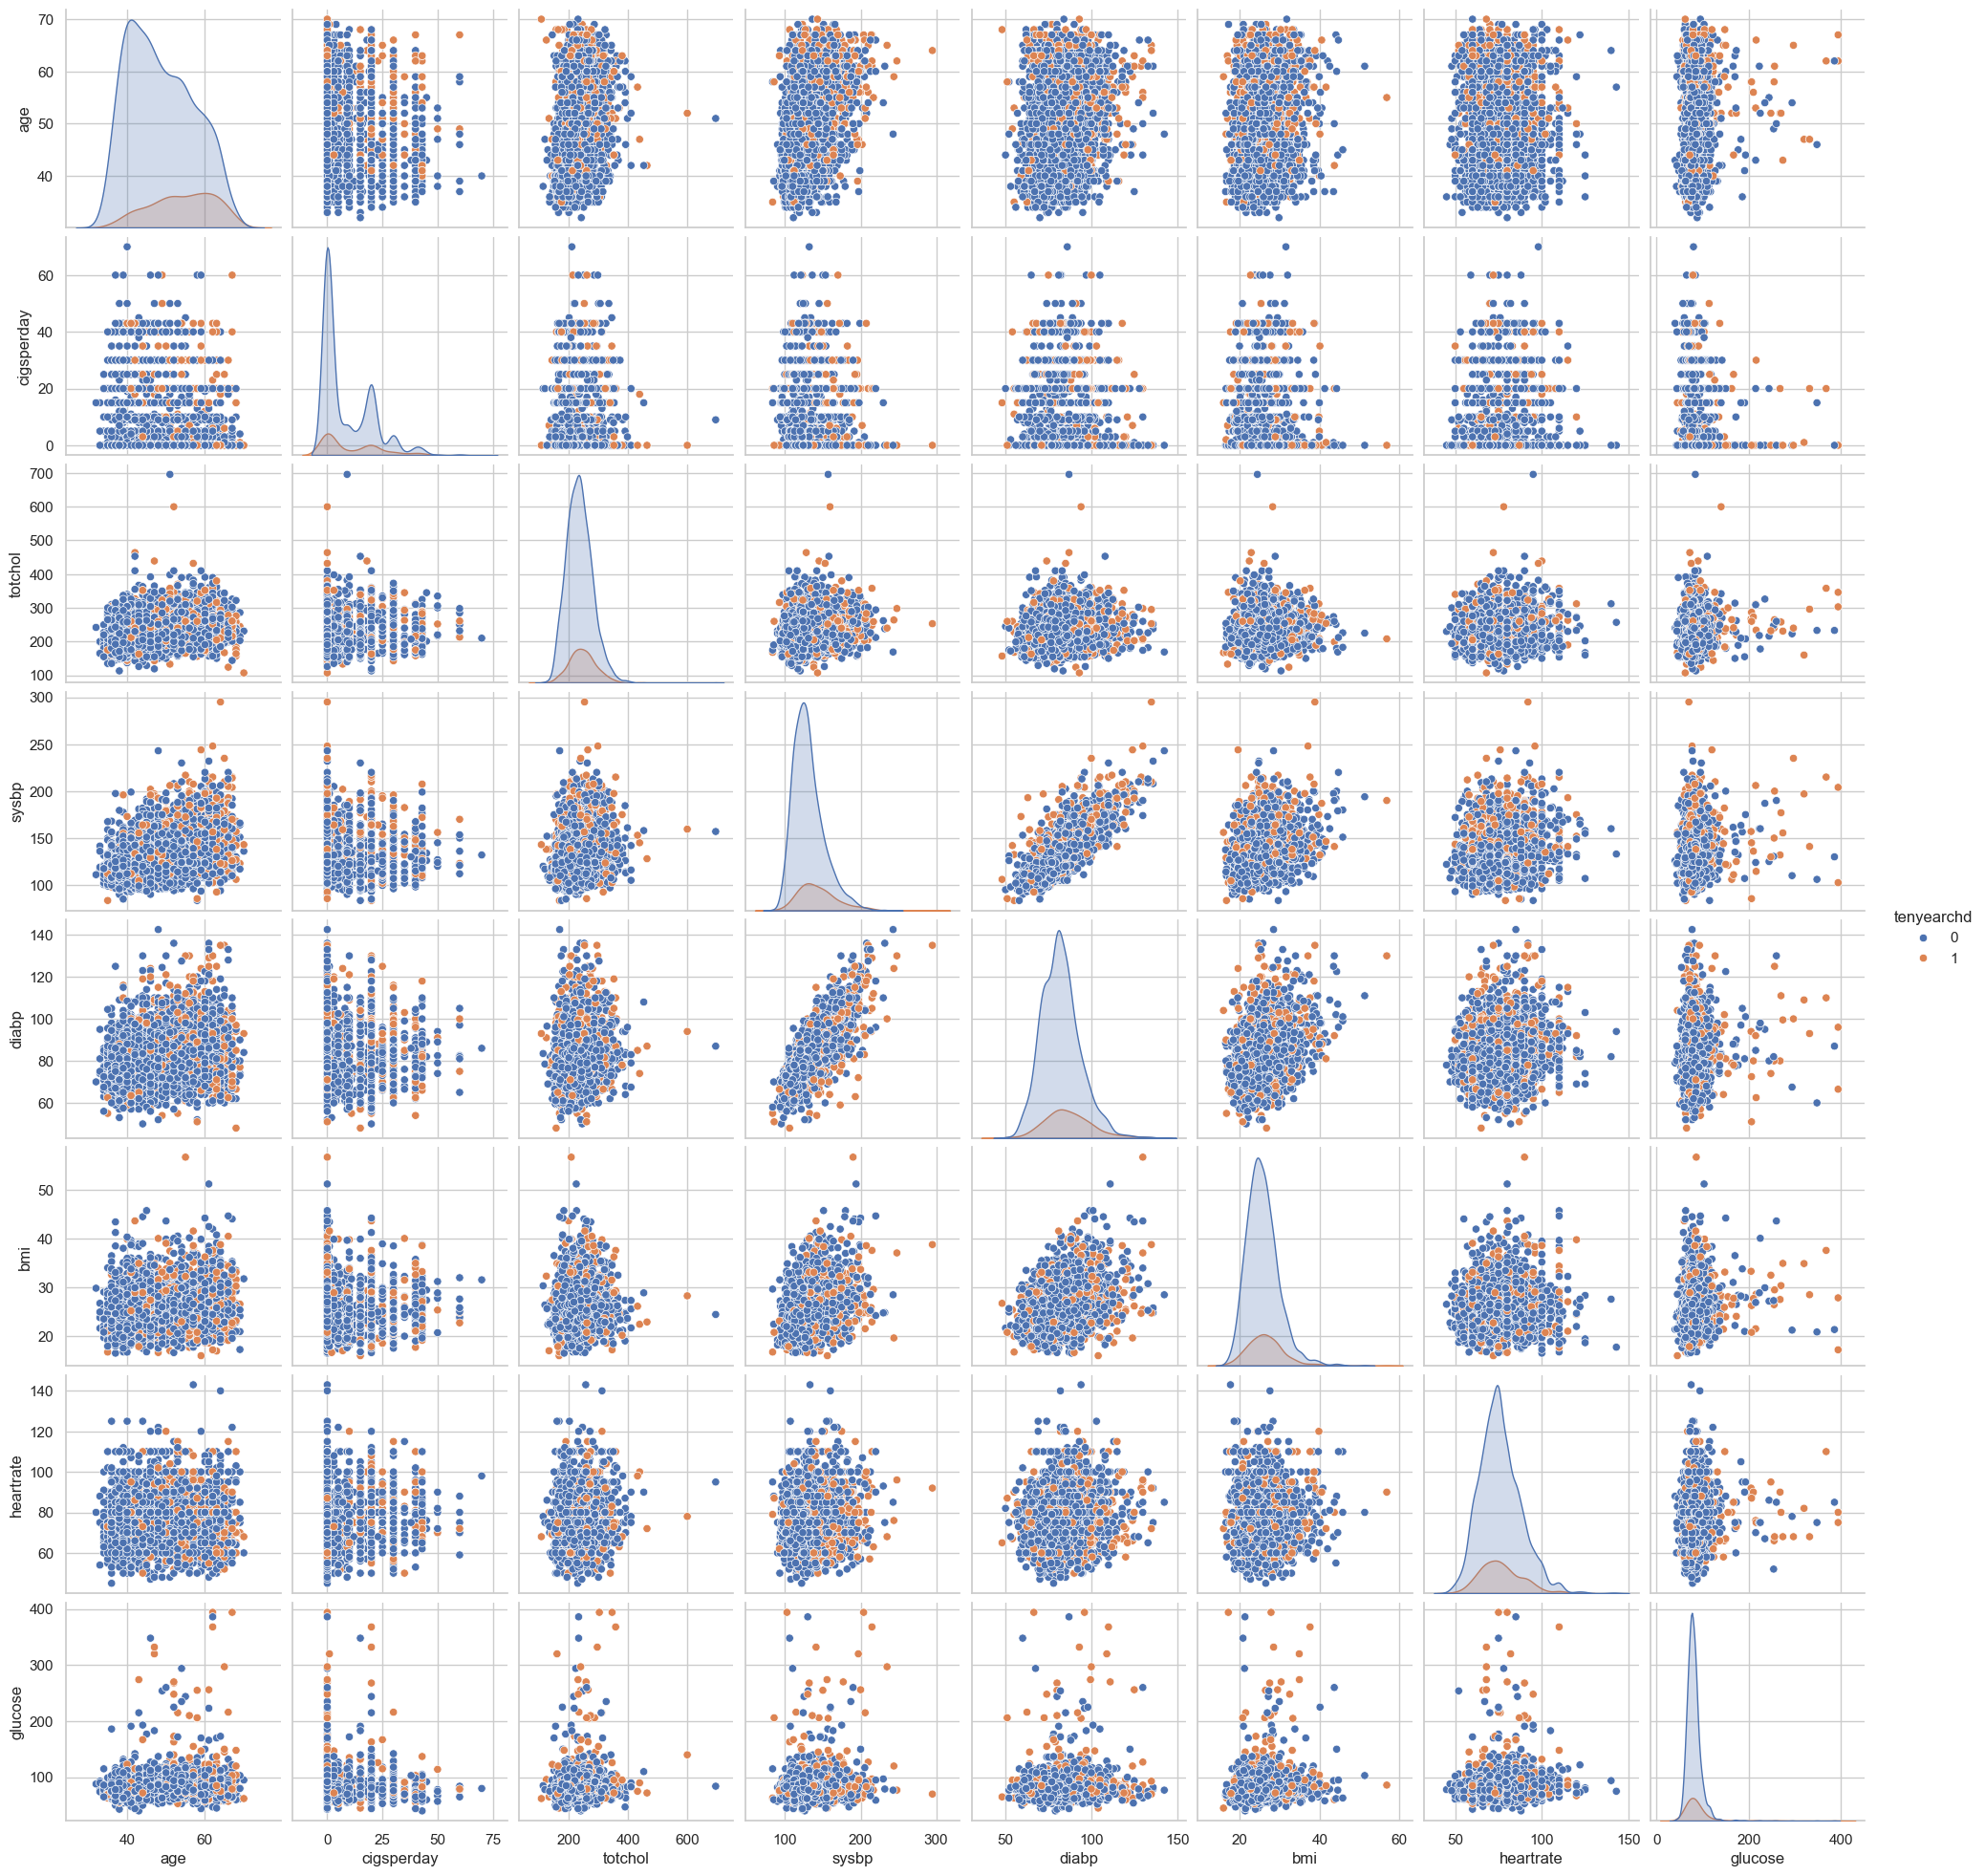

In [226]:
import seaborn as sns

sns.pairplot(df[numerical_columns + ['tenyearchd']], hue="tenyearchd")#, diag_kind="kde")

##### Correlation matrix

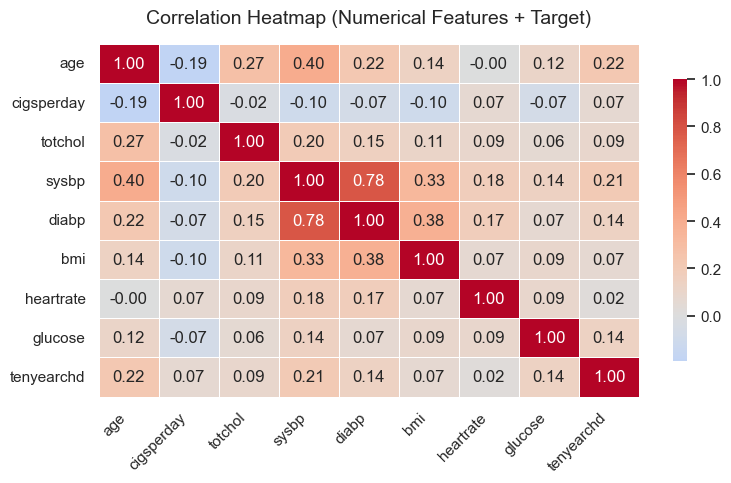

In [227]:
plt.figure(figsize=(8, 5))
corr = df[numerical_columns + [target]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", center=0,
            linewidths=0.5, cbar_kws={'shrink': 0.8})

plt.title("Correlation Heatmap (Numerical Features + Target)", fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

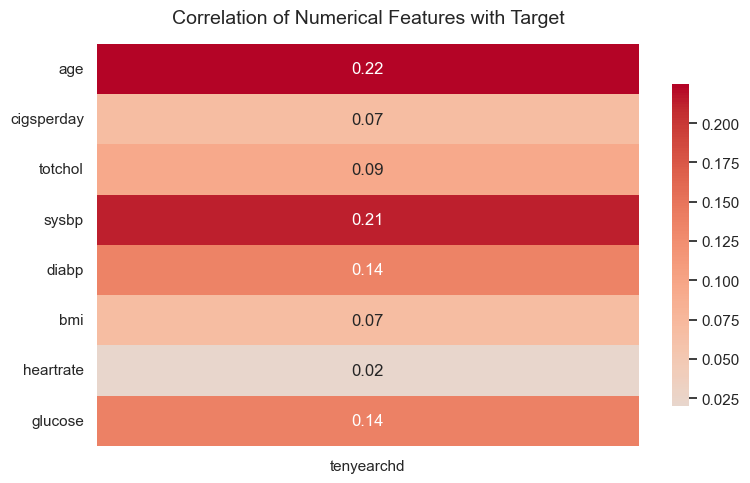

In [228]:
plt.figure(figsize=(8, 5))
corr = df[numerical_columns + [target]].corr()[[target]].drop(index=target)

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", center=0,
            cbar_kws={'shrink': 0.8})

plt.title("Correlation of Numerical Features with Target", fontsize=14, pad=15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### Outlier detection and handling the outliers

In [229]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df[numerical_columns] < (Q1 - 1.25 * IQR)) | 
                (df[numerical_columns] > (Q3 + 1.25 * IQR)))
df_outliers = df[outlier_mask.any(axis=1)]


In [230]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.25 * IQR
    upper = Q3 + 1.25 * IQR
    df[col] = np.where(df[col] < lower, lower,
              np.where(df[col] > upper, upper, df[col]))


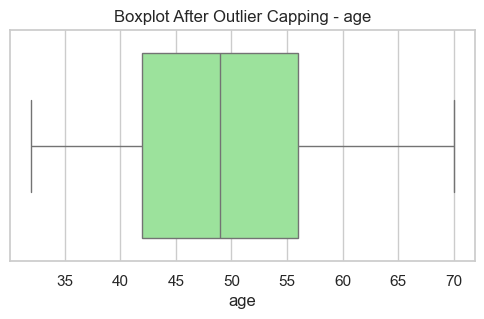

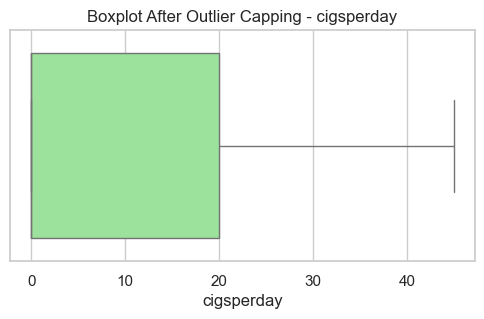

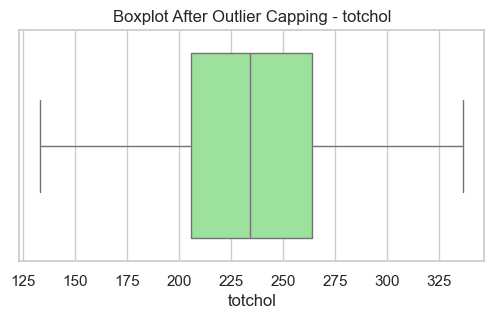

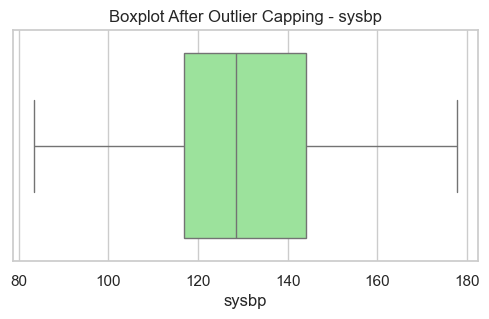

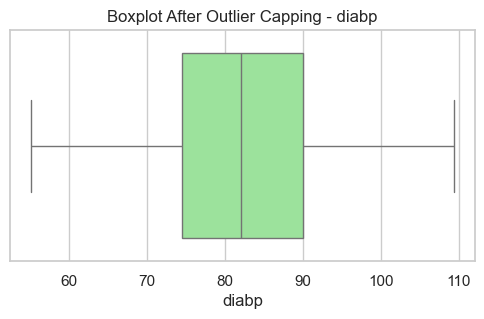

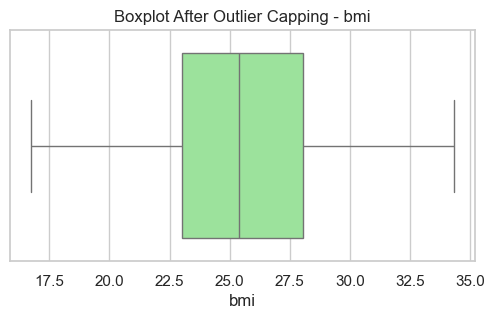

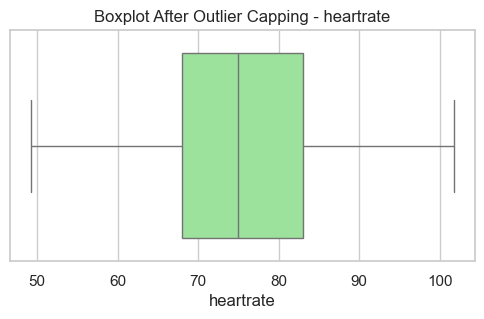

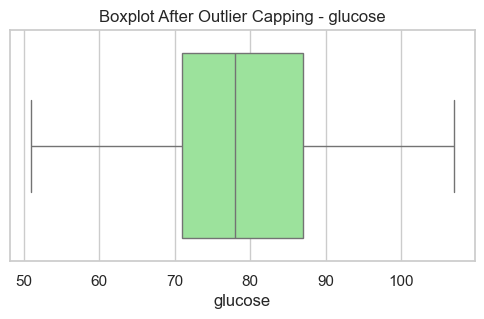

In [231]:
for col in numerical_columns:
    plt.figure(figsize=(6,3))
    
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot After Outlier Capping - {col}")
    
    plt.show()


## Hypothesis testing

In [232]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsperday', 'bpmeds',
       'prevalentstroke', 'prevalenthyp', 'diabetes', 'totchol', 'sysbp',
       'diabp', 'bmi', 'heartrate', 'glucose', 'tenyearchd'],
      dtype='object')

In [233]:
from scipy import stats

# Separate the dataset into two groups based on smoking status
smoking_group = df[df['is_smoking'] == 'YES']['age']
non_smoking_group = df[df['is_smoking'] == 'NO']['age']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(smoking_group, non_smoking_group, equal_var=False)

# Print the results
print("Independent Samples t-test Results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean age between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean age between smokers and non-smokers.")


Independent Samples t-test Results:
t-statistic: -12.57866251105806
p-value: 1.7153434850408458e-35
Reject the null hypothesis. There is a significant difference in the mean age between smokers and non-smokers.


In [234]:
!pip install statsmodels


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [235]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsperday', 'bpmeds',
       'prevalentstroke', 'prevalenthyp', 'diabetes', 'totchol', 'sysbp',
       'diabp', 'bmi', 'heartrate', 'glucose', 'tenyearchd'],
      dtype='object')

In [236]:
import statsmodels.api as sm

# Count the number of individuals with hypertension (1) and without hypertension (0) for males and females
hypertension_counts = df.groupby('sex')['prevalenthyp'].value_counts().unstack().fillna(0)

# Perform two-sample proportion z-test
z_statistic, p_value = sm.stats.proportions_ztest(hypertension_counts[1], hypertension_counts.sum(axis=1))

# Print the results
print("Two-Sample Proportion Z-test Results:")
print("z-statistic:", z_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the prevalence of hypertension between males and females.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the prevalence of hypertension between males and females.")


Two-Sample Proportion Z-test Results:
z-statistic: -0.18902559429997629
p-value: 0.8500727570384323
Fail to reject the null hypothesis. There is no significant difference in the prevalence of hypertension between males and females.


In [237]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsperday', 'bpmeds',
       'prevalentstroke', 'prevalenthyp', 'diabetes', 'totchol', 'sysbp',
       'diabp', 'bmi', 'heartrate', 'glucose', 'tenyearchd'],
      dtype='object')

In [238]:
import pandas as pd
from scipy.stats import chi2_contingency

# Columns to test
cols_to_test = ['bpmeds', 'prevalentstroke', 'diabetes']
target = 'tenyearchd'

# Loop through each column and perform Chi-square test
for col in cols_to_test:
    # Create a contingency table
    contingency_table = pd.crosstab(df[col], df[target])
    
    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print results
    print(f"--- {col} ---")
    print("Contingency Table:")
    print(contingency_table)
    print(f"Chi2 Statistic = {chi2:.4f}, p-value = {p:.4f}")
    
    # Interpret result
    if p < 0.05:
        print(f"=> {col} is significantly associated with {target} (reject H0)\n")
    else:
        print(f"=> {col} is NOT significantly associated with {target} (fail to reject H0)\n")


--- bpmeds ---


Contingency Table:
tenyearchd     0    1
bpmeds               
0.0         2776  471
1.0           67   33
Chi2 Statistic = 24.5164, p-value = 0.0000
=> bpmeds is significantly associated with tenyearchd (reject H0)

--- prevalentstroke ---
Contingency Table:
tenyearchd          0    1
prevalentstroke           
0                2868  501
1                  12   10
Chi2 Statistic = 13.6739, p-value = 0.0002
=> prevalentstroke is significantly associated with tenyearchd (reject H0)

--- diabetes ---
Contingency Table:
tenyearchd     0    1
diabetes             
0           2826  478
1             54   33
Chi2 Statistic = 34.6540, p-value = 0.0000
=> diabetes is significantly associated with tenyearchd (reject H0)



## Data wrangling

#### 1) handling null values

In [239]:
import pandas as pd
from sklearn.impute import KNNImputer

# ---------- Categorical / Ordinal ----------
# education (mode or median if ordinal)
df['education'].fillna(df['education'].mode()[0], inplace=True)

# ---------- Binary ----------
# BPMeds (0/1) → use mode
df['bpmeds'].fillna(df['bpmeds'].mode()[0], inplace=True)

# ---------- Numerical ----------
# Columns where mean is okay (roughly normal distribution)
mean_cols = ['cigsperday', 'totchol', 'bmi', 'heartrate']
for col in mean_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# ---------- Special case ----------
# glucose has many missing values → use KNN imputer
imputer = KNNImputer(n_neighbors=5)
df[['glucose']] = imputer.fit_transform(df[['glucose']])

# ---------- Check ----------
print(df.isna().sum())

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsperday         0
bpmeds             0
prevalentstroke    0
prevalenthyp       0
diabetes           0
totchol            0
sysbp              0
diabp              0
bmi                0
heartrate          0
glucose            0
tenyearchd         0
dtype: int64


In [240]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# ----------------- Medical Features -----------------
def blood_presure_classification(SysBP, DiaBP):
    if (SysBP < 90) and (DiaBP < 60):
        return 0
    if (SysBP < 120) and (DiaBP < 80):
        return 1
    if (SysBP < 130) and (DiaBP < 86):
        return 2
    if (SysBP < 140) and (DiaBP < 90):
        return 3
    if (SysBP > 140) and (DiaBP < 90):
        return 4
    if (SysBP < 160) and (DiaBP < 100):
        return 5
    if (SysBP < 180) and (DiaBP < 110):
        return 6
    return 7

df['Hypertension'] = df.apply(lambda x: blood_presure_classification(x['sysbp'], x['diabp']), axis=1)

def diabetes_grade(glucose):
    if glucose < 100:
        return 1
    if glucose < 125:
        return 2
    if glucose < 200:
        return 3
    if glucose < 400:
        return 4
    return 5

df['Diabetes_grade'] = df['glucose'].apply(diabetes_grade)

df["mean_art_pressure"] = (df["sysbp"] + 2 * df["diabp"]) / 3

# ----------------- Interaction & Derived Features -----------------
df['bp_diff'] = df['sysbp'] - df['diabp']
df['age_bmi'] = df['age'] * df['bmi']

# ----------------- Encode categorical features -----------------
df['sex'] = df['sex'].map({'F':0,'M':1}).astype('category')
df['is_smoking'] = df['is_smoking'].astype('category')

# Fix: convert 'is_smoking' to numeric for multiplication
df['is_smoking_num'] = df['is_smoking'].cat.codes if str(df['is_smoking'].dtype) == 'category' else df['is_smoking']
df['smoking_intensity'] = df['cigsperday'] * df['is_smoking_num']

In [241]:
# ----------------- Drop redundant columns -----------------
df = df.drop(columns=['bpmeds','prevalenthyp','id','is_smoking'])

#### 2) encoding categorical data

In [242]:
df['Hypertension'] = df['Hypertension'].astype('category')
df['Diabetes_grade'] = df['Diabetes_grade'].astype('category')
df['prevalentstroke'] = df['prevalentstroke'].astype('category')
df['diabetes'] = df['diabetes'].astype('category')
df['tenyearchd'] = df['tenyearchd'].astype('category')

#### 3) changing data types

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3391 entries, 0 to 3390
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                3391 non-null   float64 
 1   education          3391 non-null   float64 
 2   sex                3391 non-null   category
 3   cigsperday         3391 non-null   float64 
 4   prevalentstroke    3391 non-null   category
 5   diabetes           3391 non-null   category
 6   totchol            3391 non-null   float64 
 7   sysbp              3391 non-null   float64 
 8   diabp              3391 non-null   float64 
 9   bmi                3391 non-null   float64 
 10  heartrate          3391 non-null   float64 
 11  glucose            3391 non-null   float64 
 12  tenyearchd         3391 non-null   category
 13  Hypertension       3391 non-null   category
 14  Diabetes_grade     3391 non-null   category
 15  mean_art_pressure  3391 non-null   float64 
 16  bp_dif

In [244]:
# Ordinal categorical (education)
df['education'] = df['education'].astype('int')

# Binary categorical features → category
binary_cols = ['sex', 'is_smoking_num', 'prevalentstroke', 'diabetes', 'tenyearchd']  # removed 'prevalenthyp'
for col in binary_cols:
    df[col] = df[col].astype('category')

# Check
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3391 entries, 0 to 3390
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                3391 non-null   float64 
 1   education          3391 non-null   int64   
 2   sex                3391 non-null   category
 3   cigsperday         3391 non-null   float64 
 4   prevalentstroke    3391 non-null   category
 5   diabetes           3391 non-null   category
 6   totchol            3391 non-null   float64 
 7   sysbp              3391 non-null   float64 
 8   diabp              3391 non-null   float64 
 9   bmi                3391 non-null   float64 
 10  heartrate          3391 non-null   float64 
 11  glucose            3391 non-null   float64 
 12  tenyearchd         3391 non-null   category
 13  Hypertension       3391 non-null   category
 14  Diabetes_grade     3391 non-null   category
 15  mean_art_pressure  3391 non-null   float64 
 16  bp_dif

In [245]:
# ----------------- Log-transform skewed numeric features -----------------
skew_cols = ['cigsperday','totchol','glucose','bmi']
for col in skew_cols:
    df[col] = np.log1p(df[col])

# ----------------- Scale numeric features -----------------
num_cols = ['age','cigsperday','totchol','sysbp','diabp','bmi','heartrate','glucose',
            'bp_diff','age_bmi','smoking_intensity','mean_art_pressure']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [246]:
df

age  education sex  cigsperday prevalentstroke diabetes   totchol  \
0     1.682811          2   0    0.010904               0        0 -0.283486   
1    -1.576533          4   1   -0.935952               0        0 -0.513866   
2    -0.412481          1   0    0.701839               0        0  0.399973   
3     0.053139          1   1    1.143493               0        0  0.009568   
4     1.682811          1   0    1.409502               0        0  0.196702   
...        ...        ...  ..         ...             ...      ...       ...   
3386 -0.412481          1   0   -0.935952               0        0 -0.864430   
3387 -0.645292          3   1    0.010904               0        0  2.048353   
3388  1.217191          1   1   -0.935952               0        0 -1.091676   
3389  0.518760          3   0   -0.935952               0        0  1.184736   
3390  0.518760          3   0   -0.935952               0        0  1.184736   

         sysbp     diabp       bmi  heartrate   glucose tenyearchd  \
0     0.801239  0.207280  0.069678   1.255714  0.090853          1   
1     1.794228  1.356729  1.094070  -0.332037 -0.348466          0   
2    -0.787542 -1.030587 -1.527861   1.079297  1.190105          0   
3     1.297734  0.472538  0.733094  -0.684870  1.190105          1   
4     0.230271  0.207280  0.267167  -0.508454 -0.169366          0   
...        ...       ...       ...        ...       ...        ...   
3386 -1.482634 -2.356874 -1.006315   0.373630  0.423206          0   
3387  1.595630  2.362496  0.893111  -0.243828 -0.626154          1   
3388  1.744578  1.975663 -0.685526   0.373630  0.503850          0   
3389 -0.390347 -0.500073  1.119670   0.285422  1.043398          0   
3390 -0.390347 -0.500073  1.119670   0.285422  1.043398          0   

     Hypertension Diabetes_grade  mean_art_pressure   bp_diff   age_bmi  \
0               4              1           0.516392  1.031141  1.185387   
1               6              1           1.656957  1.554425 -0.662100   
2               1              1          -0.971302 -0.314445 -1.100512   
3               4              1           0.913110  1.554425  0.441139   
4               3              1           0.231250  0.171461  1.339428   
...           ...            ...                ...       ...       ...   
3386            1              1          -2.062277 -0.239690 -0.861102   
3387            6              1           2.121861  0.405070 -0.013113   
3388            6              1           1.979290  0.956386  0.336401   
3389            2              1          -0.475404 -0.164936  1.089350   
3390            2              1          -0.475404 -0.164936  1.089350   

     is_smoking_num  smoking_intensity  
0                 1          -0.516401  
1                 0          -0.773964  
2                 1           0.084580  
3                 1           0.943124  
4                 1           1.801669  
...             ...                ...  
3386              0          -0.773964  
3387              1          -0.516401  
3388              0          -0.773964  
3389              0          -0.773964  
3390              0          -0.773964  

[3391 rows x 20 columns]

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df.drop("tenyearchd", axis=1)
y = df['tenyearchd']

#splitting the data into 85/15 ration
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=6)

In [263]:
from imblearn.combine import SMOTEENN

# Apply SMOTEENN on training data
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

print("Resampled class distribution:\n", pd.Series(y_train_resampled).value_counts())


Resampled class distribution:
 tenyearchd
1    2332
0    1257
Name: count, dtype: int64


In [264]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', 
                             scale_pos_weight=(y_train.value_counts()[0]/y_train.value_counts()[1]),
                             random_state=42)
}


In [265]:
from sklearn.metrics import f1_score, recall_score, roc_auc_score
import pandas as pd

results = []

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    f1 = f1_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_test.astype(int), y_proba) if y_proba is not None else None
    
    results.append({
        "Model": name,
        "F1-CHD": f1,
        "Recall-CHD": recall,
        "ROC-AUC": roc_auc
    })

results_df = pd.DataFrame(results).sort_values(by="F1-CHD", ascending=False)
print(results_df)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [248]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data only
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [249]:
X_train_resampled.shape

(4884, 19)

In [250]:
y_train_resampled.shape

(4884,)

In [257]:
print(X_train_resampled.isna().sum())
print(X_test.isna().sum())


age                    0
education              0
sex                  547
cigsperday             0
prevalentstroke       36
diabetes             122
totchol                0
sysbp                  0
diabp                  0
bmi                    0
heartrate              0
glucose                0
Hypertension         659
Diabetes_grade       155
mean_art_pressure      0
bp_diff                0
age_bmi                0
is_smoking_num       119
smoking_intensity      0
dtype: int64
age                  0
education            0
sex                  0
cigsperday           0
prevalentstroke      0
diabetes             0
totchol              0
sysbp                0
diabp                0
bmi                  0
heartrate            0
glucose              0
Hypertension         0
Diabetes_grade       0
mean_art_pressure    0
bp_diff              0
age_bmi              0
is_smoking_num       0
smoking_intensity    0
dtype: int64


In [266]:
# ----------------- Impute numeric columns -----------------
num_cols = X_train_resampled.select_dtypes(include=[np.number]).columns
X_train_resampled[num_cols] = X_train_resampled[num_cols].fillna(X_train_resampled[num_cols].median())
X_test[num_cols] = X_test[num_cols].fillna(X_train_resampled[num_cols].median())  # use train median

# ----------------- Impute categorical columns -----------------
cat_cols = X_train_resampled.select_dtypes(include=['category']).columns
for col in cat_cols:
    mode_val = X_train_resampled[col].mode()[0]
    X_train_resampled[col] = X_train_resampled[col].fillna(mode_val)
    X_test[col] = X_test[col].fillna(mode_val)  # use train mode

# ----------------- Convert categorical features to numeric -----------------
X_train_resampled = pd.get_dummies(X_train_resampled, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both train and test have same columns
X_test = X_test.reindex(columns=X_train_resampled.columns, fill_value=0)

# ----------------- Check -----------------
print(X_train_resampled.isna().sum().sum())  # should be 0
print(X_test.isna().sum().sum())            # should be 0


KeyError: 'sex'

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# ------------------ Initialize models ------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

# ------------------ Train and Evaluate ------------------
for name, model in models.items():
    # Train on resampled data
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on original test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    print(f"\n========== {name} ==========")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    if y_proba is not None:
        auc = roc_auc_score(y_test.astype(int), y_proba)
        print("ROC-AUC Score:", auc)



========== Logistic Regression ==========
Confusion Matrix:
 [[276 162]
 [ 30  41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.63      0.74       438
           1       0.20      0.58      0.30        71

    accuracy                           0.62       509
   macro avg       0.55      0.60      0.52       509
weighted avg       0.80      0.62      0.68       509

ROC-AUC Score: 0.662261238664866

========== Naive Bayes ==========
Confusion Matrix:
 [[287 151]
 [ 27  44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.66      0.76       438
           1       0.23      0.62      0.33        71

    accuracy                           0.65       509
   macro avg       0.57      0.64      0.55       509
weighted avg       0.82      0.65      0.70       509

ROC-AUC Score: 0.6549938902823332

========== SVM ==========
Confusion Matrix:
 [[310 128]
 [ 36  35]

In [261]:
pip install xgboost


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   -- ------------------------------------- 2.9/56.8 MB 15.4 MB/s eta 0:00:04
   ---- ----------------------------------- 5.8/56.8 MB 14.0 MB/s eta 0:00:04
   ------ --------------------------------- 8.9/56.8 MB 14.3 MB/s eta 0:00:04
   -------- ------------------------------- 11.8/56.8 MB 14.2 MB/s eta 0:00:04
   ---------- ----------------------------- 15.5/56.8 MB 14.6 MB/s eta 0:00:03
   -------------- ------------------------- 19.9/56.8 MB 15.6 MB/s eta 0:00:03
   ----------------- ---------------------- 24.9/56.8 MB 16.9 MB/s eta 0:00:02
   -------------------- ------------------- 29.4/56.8 MB 17.3 MB/s eta 0:00:02
   ------------------------ --------------- 35.4/56.8 MB 18.4 MB/s eta 0:00:02
   ---------------------------- ----------- 40.9/56.8 MB 19.2 MB/s eta 0:00:01
   --------------------------------- ------ 47.2/56.8 MB 20.1 MB/s eta 0:00:01
   ------------------------------------- -- 53.5/56.8 MB 21.0 MB


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [262]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, recall_score, roc_auc_score
import pandas as pd

# ------------------ Initialize models ------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []

# ------------------ Train and evaluate ------------------
for name, model in models.items():
    # Train
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on test
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    # Metrics for positive class (CHD)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_test.astype(int), y_proba) if y_proba is not None else None
    
    results.append({
        "Model": name,
        "F1-CHD": f1,
        "Recall-CHD": recall,
        "ROC-AUC": roc_auc
    })

# ------------------ Convert to DataFrame and sort ------------------
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1-CHD", ascending=False)
print(results_df)


                 Model    F1-CHD  Recall-CHD   ROC-AUC
1          Naive Bayes  0.330827    0.619718  0.654994
2        Random Forest  0.308725    0.323944  0.676378
0  Logistic Regression  0.299270    0.577465  0.662261
3              XGBoost  0.236220    0.211268  0.629301
